In [63]:
# Import libraries
import pandas as pd 
import seaborn as sns
import os 

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

# Read in the data

pwd = os.getcwd()
filepath = pwd + "\\movies.csv"
df = pd.read_csv(filepath)

In [6]:
# Let's look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [64]:
# Let's see if there is any missing data

for col in df.columns:
    print(df[col].isnull().value_counts(), "\n")

False    7668
Name: name, dtype: int64 

False    7591
True       77
Name: rating, dtype: int64 

False    7668
Name: genre, dtype: int64 

False    7668
Name: year, dtype: int64 

False    7666
True        2
Name: released, dtype: int64 

False    7665
True        3
Name: score, dtype: int64 

False    7665
True        3
Name: votes, dtype: int64 

False    7668
Name: director, dtype: int64 

False    7665
True        3
Name: writer, dtype: int64 

False    7667
True        1
Name: star, dtype: int64 

False    7665
True        3
Name: country, dtype: int64 

False    5497
True     2171
Name: budget, dtype: int64 

False    7479
True      189
Name: gross, dtype: int64 

False    7651
True       17
Name: company, dtype: int64 

False    7664
True        4
Name: runtime, dtype: int64 



In [65]:
# Drop rows with missing data

df = df.dropna()

In [8]:
# Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [66]:
# Change data type of columns

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [67]:
# Split the string to seperate only dates

new = df['released'].str.split(" \(", n = 1, expand = True)
df['released_date'] = new[0]

In [68]:
# Convert the datatype to datetime

df['released_date'] = pd.to_datetime(df['released_date'])
df['released_date']

0      1980-06-13
1      1980-07-02
2      1980-06-20
3      1980-07-02
4      1980-07-25
          ...    
7648   2020-01-17
7649   2020-02-14
7650   2020-01-17
7651   2020-02-21
7652   2020-08-28
Name: released_date, Length: 5421, dtype: datetime64[ns]

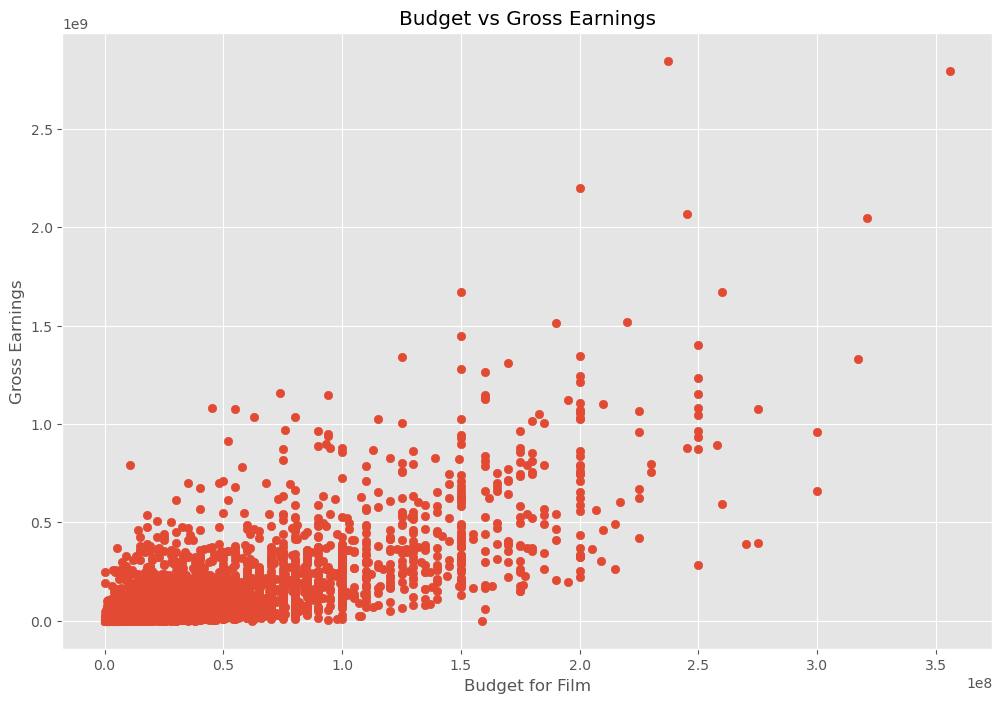

In [46]:
# Scatter plot

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

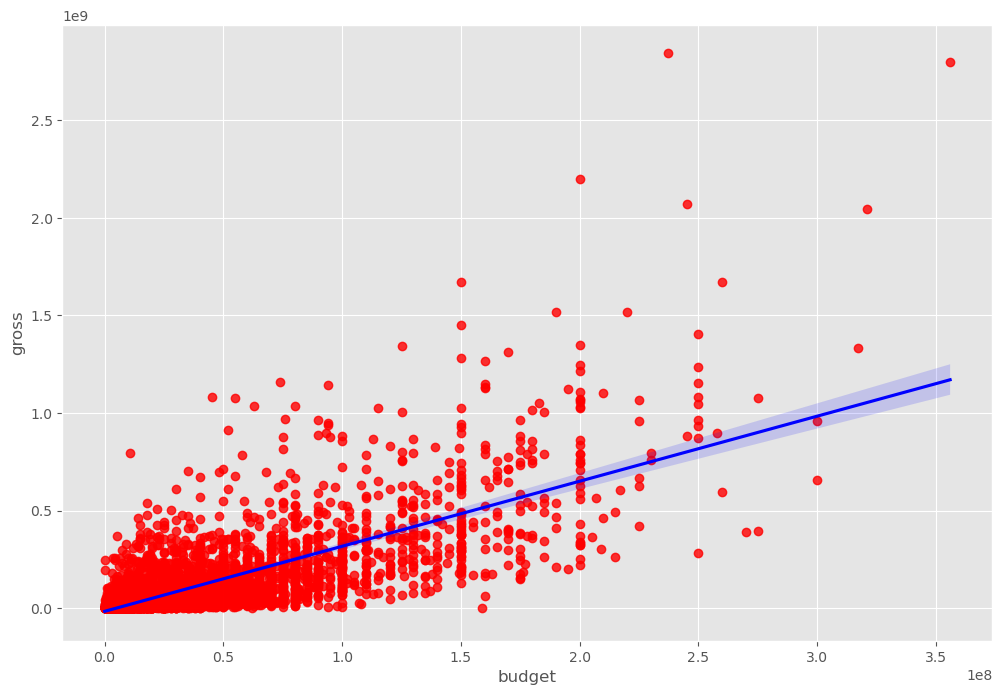

In [79]:
# Plot budget vs gross earnings using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [73]:
# Let's start looking at correlation

df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


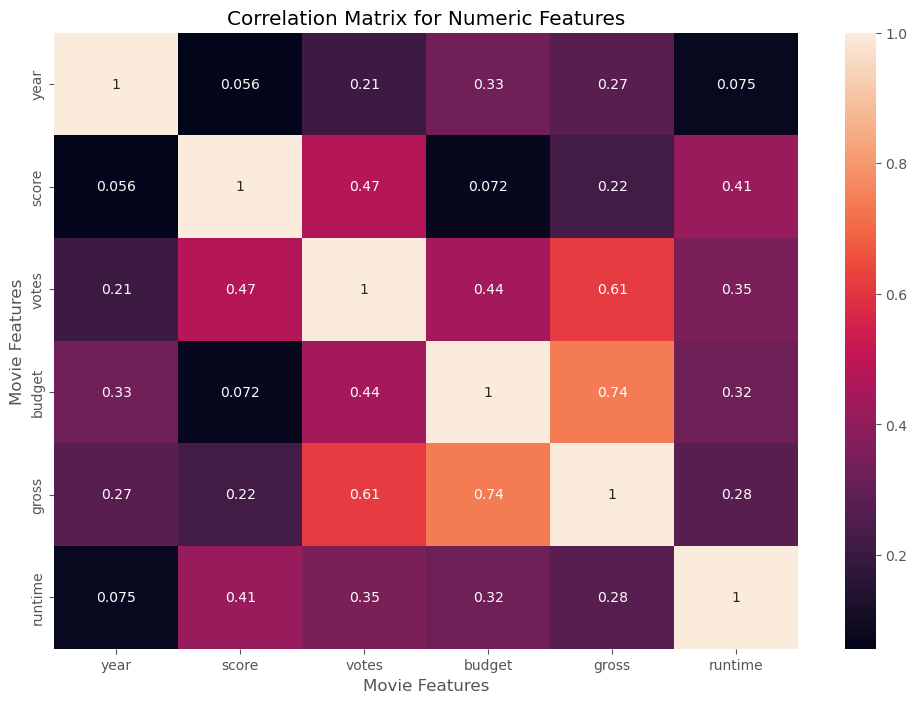

In [75]:
# High Correlation between budget and gross

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

plt.show()